## Ters Kuantum Fourier Dönüşümü

In [1]:
import cirq
import numpy as np
from matplotlib import pyplot

In [2]:
# Bir Ters QFT Devresi oluşturur.
def make_qft_inverse(qubits):
    qreg = list(qubits)[::-1]
    while len(qreg) > 0:
        q_head = qreg.pop(0)
        yield cirq.H(q_head)
        for i, qubit in enumerate(qreg):
            yield (cirq.CZ ** (-1 / 2 ** (i + 1)))(qubit, q_head)

In [3]:
qubits = cirq.LineQubit.range(4)
tqft = cirq.Circuit(make_qft_inverse(qubits))
tqft.append(cirq.measure(*qubits, key="M"))
print(tqft)

                   ┌────────┐   ┌──────────────┐   ┌────────┐
0: ──────────────────────────────@──────────────────@───────────@────────H───M('M')───
                                 │                  │           │            │
1: ─────────────────@────────────┼───────@──────────┼──────H────@^-0.5───────M────────
                    │            │       │          │                        │
2: ───────@─────────┼──────H─────┼───────@^-0.5─────@^-0.25──────────────────M────────
          │         │            │                                           │
3: ───H───@^-0.5────@^-0.25──────@^(-1/8)────────────────────────────────────M────────
                   └────────┘   └──────────────┘   └────────┘


In [4]:
iqft_operation = cirq.qft(*qubits, inverse=True, without_reverse=True)
iqft_cirq = cirq.Circuit(iqft_operation)
print(iqft_cirq)


0: ───qft[norev]^-1───
      │
1: ───#2──────────────
      │
2: ───#3──────────────
      │
3: ───#4──────────────


## Kauntum Fourier - Ters Kuantum Fourier Örneği

In [5]:
qubits = cirq.LineQubit.range(4)

# 5 = bin(101). Bu nedenle 0. ve 2. kubitlere X uygulanir.
qft_cirq = cirq.Circuit()
qft_cirq.append(cirq.X(qubits[0]))
qft_cirq.append(cirq.X(qubits[2]))
qft_operation = cirq.qft(*qubits, without_reverse=True)
qft_cirq.append(qft_operation)

print(qft_cirq)

0: ───X───qft[norev]───
          │
1: ───────#2───────────
          │
2: ───X───#3───────────
          │
3: ───────#4───────────


In [6]:
iqft_operation = cirq.qft(*qubits, inverse=True, without_reverse=True)
iqft_cirq = cirq.Circuit(iqft_operation)
qft_cirq.append(iqft_cirq)
qft_cirq.append(cirq.measure(*qubits, key="M"))
print(qft_cirq)

0: ───X───qft[norev]───qft[norev]^-1───M('M')───
          │            │               │
1: ───────#2───────────#2──────────────M────────
          │            │               │
2: ───X───#3───────────#3──────────────M────────
          │            │               │
3: ───────#4───────────#4──────────────M────────


In [7]:
sim = cirq.Simulator()
results = sim.run(qft_cirq, repetitions=1024)

Text(0, 0.5, 'Adet')

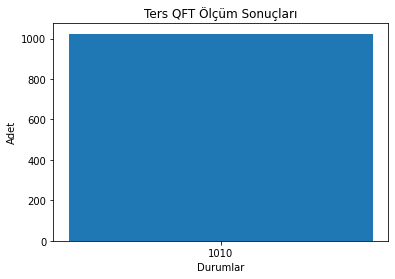

In [9]:
hist = dict()
for val in results.measurements["M"]:
    new_str = ""
    for s in val:
        new_str += str(s)
    try:
        hist[new_str] += 1
    except KeyError:
        hist[new_str] = 1
        
pyplot.bar(hist.keys(), hist.values())
pyplot.title("Ters QFT Ölçüm Sonuçları")
pyplot.xlabel("Durumlar")
pyplot.ylabel("Adet")